In [27]:
import pandas as pd
import matplotlib.pyplot as plt
from prophet import Prophet


In [29]:
df=pd.read_csv('user_data.csv')
df.head()

,Date,Users
0,8/10/2021,1193.0
1,8/11/2021,1250.0
2,8/12/2021,1160.0
3,8/13/2021,817.0
4,8/14/2021,362.0


In [30]:
df.info

<bound method DataFrame.info of           Date   Users
0    8/10/2021  1193.0
1    8/11/2021  1250.0
2    8/12/2021  1160.0
3    8/13/2021   817.0
4    8/14/2021   362.0
..         ...     ...
413  9/27/2022  1816.0
414  9/28/2022  1859.0
415  9/29/2022  1856.0
416  9/30/2022  1408.0
417        NaN     NaN

[418 rows x 2 columns]>

In [31]:
df['Date']=pd.to_datetime(df['Date'])
ts = df

In [47]:
ts.columns = ['ds','y']
ts.head()
ts=ts.dropna()

<Axes: xlabel='ds'>

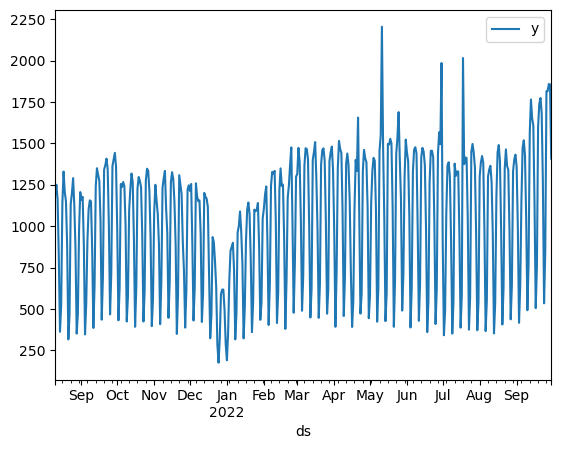

In [49]:
ts.set_index('ds').plot()

In [50]:
model=Prophet().fit(ts)
future = model.make_future_dataframe(60)
forecast=model.predict(future)
forecast.head()

23:55:57 - cmdstanpy - INFO - Chain [1] start processing
23:55:57 - cmdstanpy - INFO - Chain [1] done processing


,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2021-08-10,1002.046815,1105.796624,1510.995226,1002.046815,1002.046815,311.323226,311.323226,311.323226,311.323226,311.323226,311.323226,0.0,0.0,0.0,1313.370041
1,2021-08-11,1001.111953,1136.694969,1511.679652,1001.111953,1001.111953,326.595595,326.595595,326.595595,326.595595,326.595595,326.595595,0.0,0.0,0.0,1327.707549
2,2021-08-12,1000.177092,1065.514905,1430.604725,1000.177092,1000.177092,264.088220,264.088220,264.088220,264.088220,264.088220,264.088220,0.0,0.0,0.0,1264.265311
3,2021-08-13,999.242230,717.507744,1113.438899,999.242230,999.242230,-82.854985,-82.854985,-82.854985,-82.854985,-82.854985,-82.854985,0.0,0.0,0.0,916.387245
4,2021-08-14,998.307368,175.188227,565.098381,998.307368,998.307368,-625.529284,-625.529284,-625.529284,-625.529284,-625.529284,-625.529284,0.0,0.0,0.0,372.778084


C:\Users\pc\anaconda3\Lib\site-packages\prophet\plot.py:72: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()
C:\Users\pc\anaconda3\Lib\site-packages\prophet\plot.py:73: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  ax.plot(m.history['ds'].dt.to_pydatetime(), m.history['y'], 'k.',


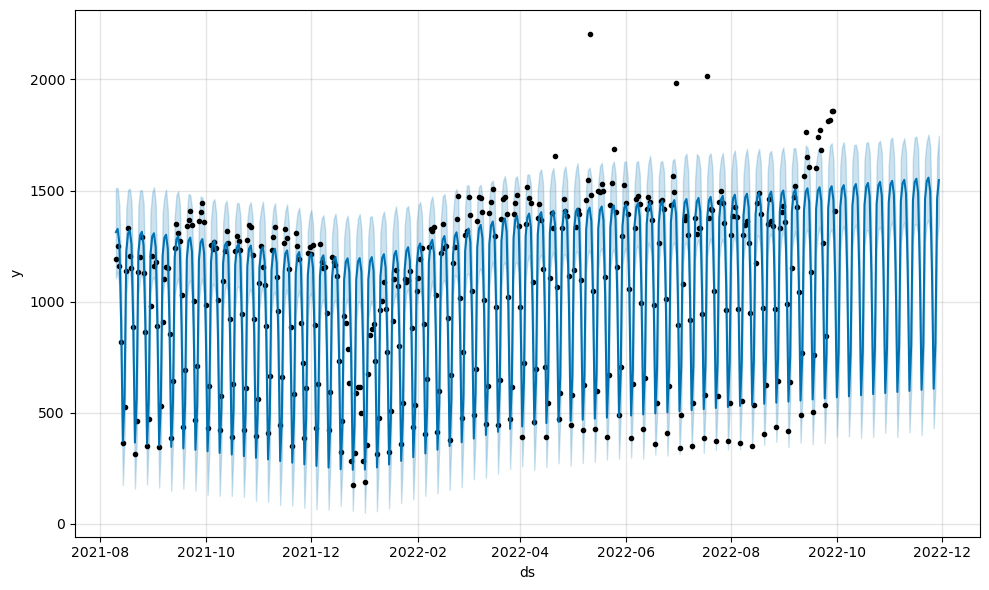

In [57]:
model.plot(forecast);

C:\Users\pc\anaconda3\Lib\site-packages\prophet\plot.py:228: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()


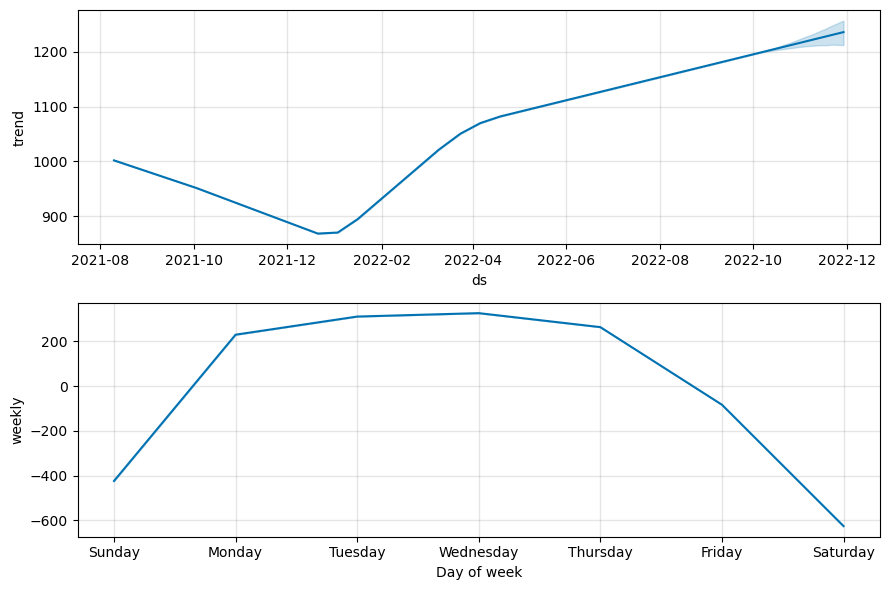

In [59]:
model.plot_components(forecast);

C:\Users\pc\anaconda3\Lib\site-packages\prophet\plot.py:72: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()
C:\Users\pc\anaconda3\Lib\site-packages\prophet\plot.py:73: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  ax.plot(m.history['ds'].dt.to_pydatetime(), m.history['y'], 'k.',


[[<matplotlib.lines.Line2D at 0x1f584bc0920>],

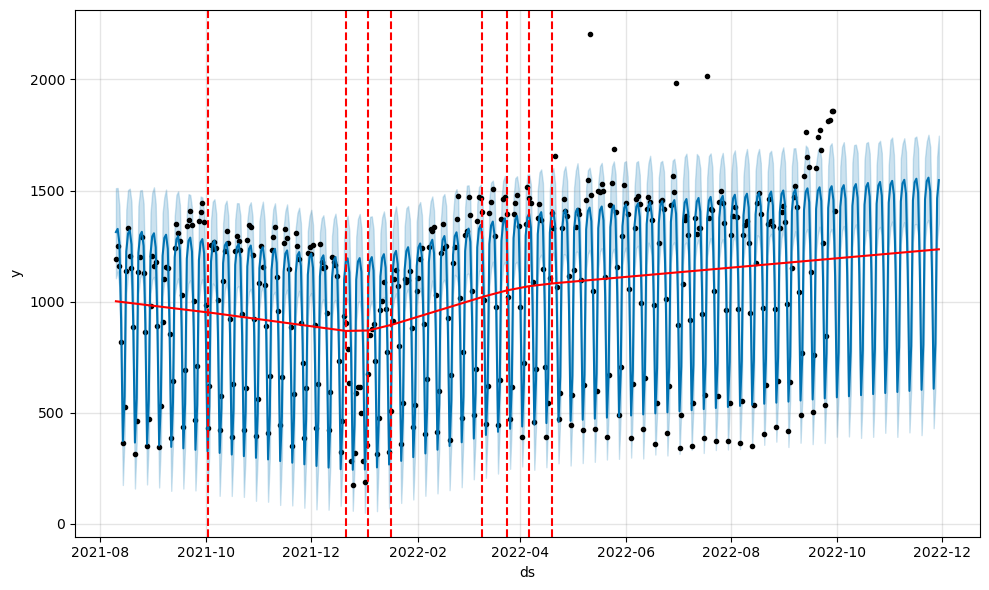

In [63]:
from prophet.plot import add_changepoints_to_plot
fig=model.plot(forecast)
add_changepoints_to_plot(fig.gca(),model,forecast)

In [67]:
model.changepoints

13    2021-08-23
27    2021-09-06
40    2021-09-19
53    2021-10-02
66    2021-10-15
80    2021-10-29
93    2021-11-11
106   2021-11-24
120   2021-12-08
133   2021-12-21
146   2022-01-03
159   2022-01-16
173   2022-01-30
186   2022-02-12
199   2022-02-25
212   2022-03-10
226   2022-03-24
239   2022-04-06
252   2022-04-19
266   2022-05-03
279   2022-05-16
292   2022-05-29
305   2022-06-11
319   2022-06-25
332   2022-07-08
Name: ds, dtype: datetime64[ns]

In [69]:
model.seasonalities

OrderedDict([('weekly',
              {'period': 7,
               'fourier_order': 3,
               'prior_scale': 10.0,
               'mode': 'additive',
               'condition_name': None})])